# Import torch, torchvision, numpy...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import copy
import scipy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset, Dataset


import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

from image_list import ImageList


import utils

# Datasets

## Download (MNIST, SVHN, COMBINED )

In [2]:
#Mean: tensor([0 1309, 0.1309, 0.1309])
#Standard Deviation: tensor([0.2893, 0.2893, 0.2893])
train_dataset_mnist = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.Compose([transforms.Grayscale(3),
                                    transforms.Resize((32, 32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,            
)
test_dataset_mnist = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = transforms.Compose([transforms.Grayscale(3),
                                    transforms.Resize((32, 32)),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
)


#Mean: tensor([0.4377, 0.4438, 0.4728])
#Standard Deviation: tensor([0.1980, 0.2010, 0.1970])
train_dataset_svhn = datasets.SVHN(
    root = 'data/SVHN',
    split = 'train',
    transform = transforms.Compose([transforms.Resize((32, 32)),
                                    ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,            
)
test_dataset_svhn = datasets.SVHN(
    root = 'data/SVHN', 
    split = 'test', 
    transform = transforms.Compose([transforms.Resize((32, 32)),
                                    ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    download = True,
)

## Creating a Concatened Dataset
train_dataset_combined = ConcatDataset([train_dataset_mnist,train_dataset_svhn])
test_dataset_combined = ConcatDataset([test_dataset_mnist,test_dataset_svhn])



# dataloaders
train_dataloader_mnist = torch.utils.data.DataLoader(train_dataset_mnist,batch_size=64, shuffle=False)
test_dataloader_mnist = torch.utils.data.DataLoader(test_dataset_mnist,batch_size=64, shuffle=False)

train_dataloader_svhn = torch.utils.data.DataLoader(train_dataset_svhn,batch_size=64, shuffle=False)
test_dataloader_svhn = torch.utils.data.DataLoader(test_dataset_svhn,batch_size=64, shuffle=False)

train_dataloader_combined = DataLoader(train_dataset_combined, batch_size=64, shuffle=False)
test_dataloader_combined = DataLoader(test_dataset_combined, batch_size=64, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

classes_20 = ["0-mnist", "1-mnist", "2-mnist", "3-mnist", "4-mnist", "5-mnist", "6-mnist", "7-mnist", "8-mnist", "9-mnist",
           "0-svhn", "1-svhn", "2-svhn", "3-svhn", "4-svhn", "5-svhn", "6-svhn", "7-svhn", "8-svhn", "9-svhn"]

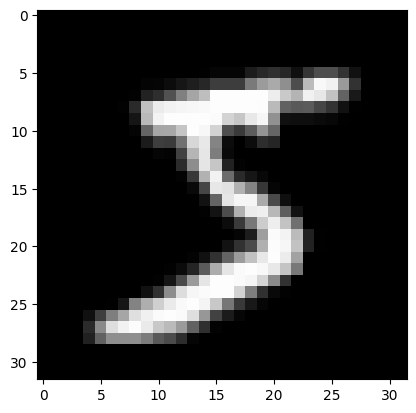

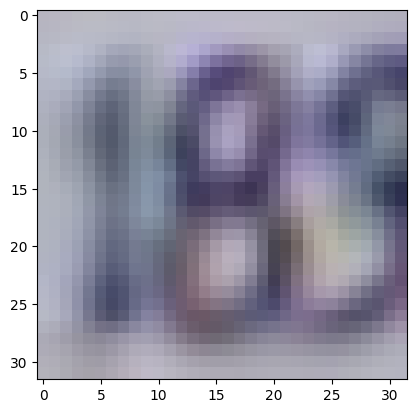

In [3]:
# utils.imshow(train_dataset_mnist[)



utils.imshow(train_dataset_mnist[0][0])
utils.imshow(test_dataset_svhn[9][0])



#dando erro
# utils.imshow(test_dataset_mnist.data[0], True, 'mnist')
# plt.imshow(test_dataset_mnist[9][0], cmap='gray')
# print(teste_dtset.data.)

In [3]:
# Calculate mean and std
#mean, std = get_mean_and_std(test_loader)
#print(f'Mean: {mean}')
#print(f'Standard Deviation: {std}')

## Print Datasets


### MNIST

torch.Size([28, 28])
torch.Size([128, 128])


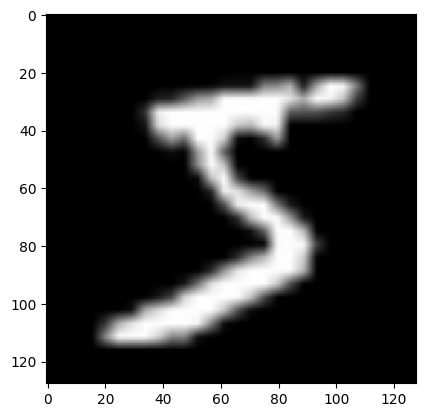

torch.Size([3, 128, 128])


In [53]:
print(train_dataset_mnist.data[0].shape)
plt.imshow(train_dataset_mnist.data[0], cmap='gray')

print(train_dataset_mnist[0][0][0].shape)
plt.imshow(train_dataset_mnist[0][0][0], cmap='gray')

# plt.title('%i' % train_dataset_mnist.targets[0])
plt.show()

# plt.figure()
print(train_dataset_mnist[0][0].shape)

# plt.title('%i' % train_dataset_mnist.targets[2])
# utils.imshow(train_dataset_mnist[2][0])
# plt.show()

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_mnist), size=(1,)).item()
    img = train_dataset_mnist.data[sample_idx]
    label = train_dataset_mnist.targets[sample_idx].item()
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

### SVHN

torch.Size([3, 32, 32])


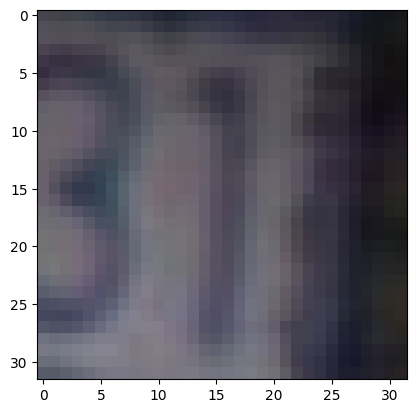

In [68]:
plt.figure()
print(train_dataset_svhn[0][0].shape)
imshow(train_dataset_svhn[9][0])

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_svhn), size=(1,)).item()
    img, label = train_dataset_svhn[sample_idx]
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    # plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

### Concatened

6


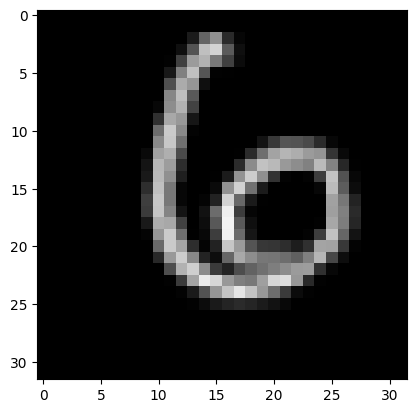

6


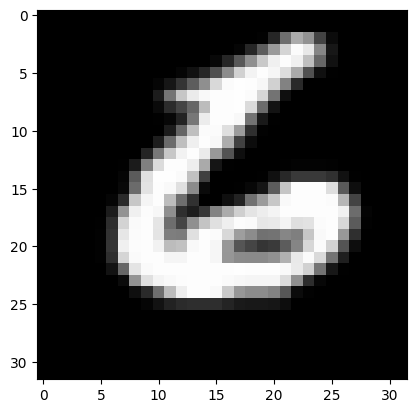

5


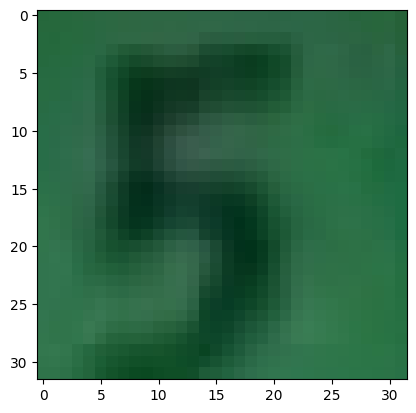

7


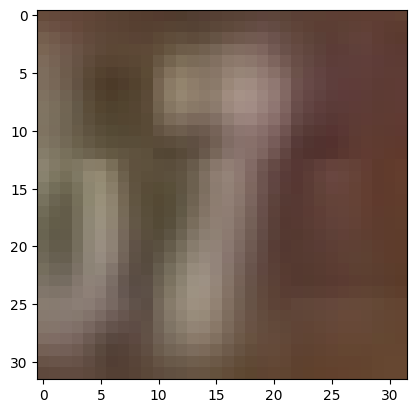

In [70]:
# Inicio
print(test_dataset_combined[100][1])
imshow(test_dataset_combined[100][0])
#mnist 0 - 9999
print(test_dataset_combined[9999][1])
imshow(test_dataset_combined[9999][0])
# Fim


# svhn 10000 - 36031
print(test_dataset_combined[10000][1])
imshow(test_dataset_combined[10000][0])
print(test_dataset_combined[36031][1])
imshow(test_dataset_combined[36031][0])
# Fim


# Models

## Create or Load

In [8]:
model_mnist = utils.create_resnet_model()
model_svhn = utils.create_resnet_model()
model_combined = utils.create_resnet_model()

In [4]:
model_mnist = utils.create_resnet_model('./my_weights/mnist_32.pth')
model_svhn = utils.create_resnet_model('./my_weights/svhn_32.pth')
model_combined = utils.create_resnet_model('./my_weights/combined_32.pth')

## Train and Save

In [11]:
# utils.train(model_mnist, train_dataloader_mnist,  epochs=10, lr=0.001)
# torch.save(model_mnist.state_dict(), './my_weights/mnist_32.pth')


# utils.train(model_svhn, train_dataloader_svhn, epochs=10, lr=0.001)
# torch.save(model_svhn.state_dict(), './my_weights/svhn_32.pth')


# utils.train(model_combined, train_dataloader_combined, epochs=10, lr=0.001)
# torch.save(model_combined.state_dict(), './my_weights/combined_32.pth')

Epoch 1/10 - Loss: 0.3548, Accuracy: 89.29%
Epoch 2/10 - Loss: 0.2136, Accuracy: 93.96%
Epoch 3/10 - Loss: 0.1688, Accuracy: 95.21%
Epoch 4/10 - Loss: 0.1350, Accuracy: 96.21%
Epoch 5/10 - Loss: 0.1055, Accuracy: 96.97%
Epoch 6/10 - Loss: 0.0817, Accuracy: 97.52%
Epoch 7/10 - Loss: 0.0636, Accuracy: 98.06%
Epoch 8/10 - Loss: 0.0516, Accuracy: 98.35%
Epoch 9/10 - Loss: 0.0418, Accuracy: 98.64%
Epoch 10/10 - Loss: 0.0366, Accuracy: 98.82%
Training complete.
Epoch 1/10 - Loss: 0.2310, Accuracy: 93.19%
Epoch 2/10 - Loss: 0.1481, Accuracy: 95.77%
Epoch 3/10 - Loss: 0.1131, Accuracy: 96.83%
Epoch 4/10 - Loss: 0.0861, Accuracy: 97.54%
Epoch 5/10 - Loss: 0.0641, Accuracy: 98.11%
Epoch 6/10 - Loss: 0.0494, Accuracy: 98.50%
Epoch 7/10 - Loss: 0.0372, Accuracy: 98.82%
Epoch 8/10 - Loss: 0.0297, Accuracy: 99.04%
Epoch 9/10 - Loss: 0.0244, Accuracy: 99.23%
Epoch 10/10 - Loss: 0.0215, Accuracy: 99.32%
Training complete.


## Evaluate

In [5]:
# Test each model in itself dataset
test_loss, accuracy = utils.evaluate(model_mnist, test_dataloader_mnist)
print(f"model_mnist - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_svhn, test_dataloader_svhn)
print(f"model_svhn - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(model_combined, test_dataloader_combined)
print(f"model_combined - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

model_mnist - Test Loss: 0.0295, Accuracy: 99.29
model_svhn - Test Loss: 0.2867, Accuracy: 93.10
model_combined - Test Loss: 0.2748, Accuracy: 93.42


In [6]:
# Test each model in combined dataset
test_loss, accuracy = utils.evaluate(model_mnist, test_dataloader_combined)
print(f"model_mnist - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

# test_loss, accuracy = utils.evaluate(model_svhn, test_dataloader_combined)
# print(f"model_svhn - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

# test_loss, accuracy = utils.evaluate(model_combined, test_dataloader_combined)
# print(f"model_combined - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

model_mnist - Test Loss: 4.0137, Accuracy: 43.71


# Copycat

## Attack Dataset

In [9]:
# Define dataset
attack_dataset = ImageList(
    filename="data/npd.txt",
    root=".",
    color=True,
    # transform=transforms.ToTensor(),
    transform = transforms.Compose([transforms.Resize((32, 32)),
                                    ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                   ]),
    return_filename=True
)

# Create DataLoader
attack_dataloader = DataLoader(attack_dataset, batch_size=64, shuffle=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/npd.txt'

In [11]:
# Iterate through the DataLoader
for img, label, path in attack_dataloader:
    print(f"Image path: {path[0]}")
    print(f"Image shape: {img[0].shape}")
    print(f"Label: {label[0]}")
    # for i in range(4):
        # print(f"{path[i]} {label[i]}")
    # plt.imshow(img[2])
    break

Image path: /home/jeiks/Christian/data/imagenet32_images/train/993/0.png
Image shape: torch.Size([3, 32, 32])
Label: 1


/home/jeiks/Christian/data/imagenet32_images/train/993/0.png 1
torch.Size([3, 32, 32])


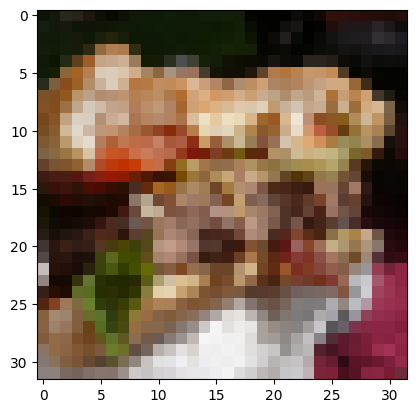

In [19]:
print(attack_dataset.data[0], attack_dataset.targets[0])
for x, y, z in attack_dataloader:
    print(x[0].shape)
    utils.imshow(x[0])
    break

In [12]:
!head -n 10 data/attack_dataset.txt
print(attack_dataset)

1-n02119789/n02119789_11756.jpeg 1
1-n02119789/n02119789_11309.jpeg 1
1-n02119789/n02119789_11131.jpeg 1
1-n02119789/n02119789_14615.jpeg 1
1-n02119789/n02119789_2159.jpeg 1
1-n02119789/n02119789_13095.jpeg 1
1-n02119789/n02119789_8146.jpeg 1
1-n02119789/n02119789_2212.jpeg 1
1-n02119789/n02119789_10572.jpeg 1
1-n02119789/n02119789_5975.jpeg 1
Dataset ImageList:
    Number of datapoints: 1281167
     * Class 0:  35881 samples
     * Class 1: 405353 samples
     * Class 2: 152131 samples
     * Class 3: 119401 samples
     * Class 4: 286891 samples
     * Class 5:  16659 samples
     * Class 6: 101608 samples
     * Class 7:  30597 samples
     * Class 8: 107467 samples
     * Class 9:  25179 samples
    Transforms (if any): Compose(
                             Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
  

## Extract Models

In [7]:
def extract_model(model, dataloader, output_file, save_softlabels=False, device="cuda" if torch.cuda.is_available() else "cpu", n_bacthes=None):
    """
    Faz inferência com um modelo PyTorch e salva o caminho da imagem e a classe inferida em um arquivo de saída.

    Args:
        model (torch.nn.Module): Modelo PyTorch treinado.
        dataloader (torch.utils.data.DataLoader): DataLoader com imagens e seus caminhos.
        output_file (str): Caminho do arquivo de saída.
        save_softlabels (bool, optional): Se True, salva as probabilidades para todas as classes. Default: False.
        device (str, optional): Dispositivo para inferência ("cuda" ou "cpu"). Default: "cuda" se disponível.
    """
    model.to(device)
    model.eval()  # Modo de inferência
    total = 0
    with open(output_file, "w") as f:
        with torch.no_grad():
            for images, _labels, paths in dataloader:  # Assumindo que o dataset retorna (imagem, caminho)
                if(n_bacthes != None and total == n_bacthes):
                    break
                total+=1
                images = images.to(device)
                outputs = model(images)

                if save_softlabels:
                    softlabels = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()
                    for path, probs in zip(paths, softlabels):
                        probs_str = " ".join(map(str, probs))  # Converte lista de probabilidades para string
                        f.write(f"{path} {probs_str}\n")
                else:
                    _, preds = torch.max(outputs, 1)  # Obtém a classe com maior probabilidade
                    for path, pred in zip(paths, preds.cpu().numpy()):
                        f.write(f"{path} {pred}\n")  # Salva caminho da imagem e classe inferida

    print(f"Inferência concluída. Resultados salvos em {output_file}")

In [8]:
# extract_model(model_mnist, attack_dataloader, "extracted_mnist.txt")
# extract_model(model_svhn, attack_dataloader, "extracted_svhn.txt")

# softlabels
extract_model(model_mnist, attack_dataloader, "data/extracted_soft_mnist.txt", save_softlabels=True)
extract_model(model_svhn, attack_dataloader, "data/extracted_soft_svhn.txt", save_softlabels=True)

# extract_model(model_svhn, attack_dataloader, "teste.txt", save_softlabels=True, n_batchs=1)

NameError: name 'attack_dataloader' is not defined

In [17]:
#verificando o fake dataset
!head ./extracted_mnist.txt 
print("===========")
# !head ./extracted_svhn.txt 

/home/jeiks/Christian/data/imagenet32_images/train/993/0.png 4
/home/jeiks/Christian/data/imagenet32_images/train/550/1.png 4
/home/jeiks/Christian/data/imagenet32_images/train/352/2.png 4
/home/jeiks/Christian/data/imagenet32_images/train/401/3.png 1
/home/jeiks/Christian/data/imagenet32_images/train/38/4.png 1
/home/jeiks/Christian/data/imagenet32_images/train/964/5.png 1
/home/jeiks/Christian/data/imagenet32_images/train/57/6.png 1
/home/jeiks/Christian/data/imagenet32_images/train/879/7.png 1
/home/jeiks/Christian/data/imagenet32_images/train/623/8.png 4
/home/jeiks/Christian/data/imagenet32_images/train/599/9.png 1
/home/jeiks/Christian/data/imagenet32_images/train/993/0.png 3
/home/jeiks/Christian/data/imagenet32_images/train/550/1.png 2
/home/jeiks/Christian/data/imagenet32_images/train/352/2.png 9
/home/jeiks/Christian/data/imagenet32_images/train/401/3.png 7
/home/jeiks/Christian/data/imagenet32_images/train/38/4.png 6
/home/jeiks/Christian/data/imagenet32_images/train/964/5.p

## Train Copycat

In [31]:
def process_file(input_path, output_path):
    with open(input_path, 'r') as infile, open(output_path, 'w') as outfile:
        for line in infile:
            processed_line = line.replace("data/IMAGENET/", "", 1)  # Remove apenas a primeira ocorrência
            outfile.write(processed_line)


# process_file("extracted_mnist.txt", "data/extracted_mnist.txt")
# process_file("extracted_svhn.txt", "data/extracted_svhn.txt")
# process_file("extracted_soft_mnist.txt", "data/extracted_soft_mnist.txt")
# process_file("extracted_soft_svhn.txt", "data/extracted_soft_svhn.txt")

In [32]:
fake_dataset_mnist = ImageList(
    filename="extracted_soft_mnist.txt",
    root="data/imagenet32_images/train",
    color=True,
    transform=transforms.ToTensor(),
    return_filename=False
)
fake_dataset_svhn = ImageList(
    filename="extracted_soft_svhn.txt",
    root="data/imagenet32_images/train",
    color=True,
    transform=transforms.ToTensor(),
    return_filename=False
)

## Creating a Concatened Dataset
fake_dataset_combined = ConcatDataset([fake_dataset_mnist,fake_dataset_svhn])


fake_dataloader_mnist = DataLoader(fake_dataset_mnist, batch_size=32, shuffle=False)
fake_dataloader_svhn = DataLoader(fake_dataset_svhn, batch_size=32, shuffle=False)
fake_dataloader_combined = DataLoader(fake_dataset_combined, batch_size=64, shuffle=True)

In [21]:
model_copycat = utils.create_resnet_model()

In [24]:
# utils.train(model_copycat, fake_dataloader_combined, epochs=10, lr=0.001)
# torch.save(model_copycat.state_dict(), './my_weights/copycat.pth')

In [23]:
model_copycat = utils.create_resnet_model()
acc1 = 0
acc2 = 1
count = 0
model_copycat2 = copy.deepcopy(model_copycat)

while acc2 > acc1:
    count +=1
    model_copycat = copy.deepcopy(model_copycat2)
    _, acc1= utils.evaluate(model_copycat, test_dataloader_combined)
    utils.train(model_copycat2, fake_dataloader_combined, epochs=1, lr=0.001)
    _, acc2 = utils.evaluate(model_copycat2, test_dataloader_combined)
    print(f'new acc={acc2}% | old acc{acc1}')
    

torch.save(model_copycat.state_dict(), f'./my_weights/copycat_32_{count}c.pth')

Epoch 1/1 - Loss: 1.2868, Accuracy: 50.72%
Training complete.
new acc=43.686167850799286% | old acc8.817162522202487
Epoch 1/1 - Loss: 1.1375, Accuracy: 52.00%
Training complete.
new acc=65.49178507992895% | old acc43.686167850799286
Epoch 1/1 - Loss: 1.0876, Accuracy: 52.43%
Training complete.
new acc=67.59269538188278% | old acc65.49178507992895
Epoch 1/1 - Loss: 1.0567, Accuracy: 52.63%
Training complete.
new acc=56.68849911190053% | old acc67.59269538188278


## Evaluate

In [19]:
def test_model_all_datasets(model):
    test_loss, accuracy = utils.evaluate(model, test_dataloader_mnist)
    print(f"model_copycat in mnist dataset- Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")
    
    test_loss, accuracy = utils.evaluate(model, test_dataloader_svhn)
    print(f"model_copycat in svhn dataset- Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")
    
    test_loss, accuracy = utils.evaluate(model, test_dataloader_combined)
    print(f"model_copycat in combined dataset- Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")
model_copycat1 = utils.create_resnet_model('./my_weights/copycat.pth')
model_copycat2 = utils.create_resnet_model('./my_weights/copycat_32_10c;2s.pth')    
test_model_all_datasets(model_copycat1)
test_model_all_datasets(model_copycat2)

model_copycat in mnist dataset- Test Loss: 2.9810, Accuracy: 73.60
model_copycat in svhn dataset- Test Loss: 18.0022, Accuracy: 58.35
model_copycat in combined dataset- Test Loss: 13.8334, Accuracy: 62.58
model_copycat in mnist dataset- Test Loss: 4.5535, Accuracy: 60.36
model_copycat in svhn dataset- Test Loss: 28.1409, Accuracy: 80.52
model_copycat in combined dataset- Test Loss: 21.5946, Accuracy: 74.93


In [20]:
test_model_all_datasets(model_svhn)

model_copycat in mnist dataset- Test Loss: 1.5105, Accuracy: 65.01
model_copycat in svhn dataset- Test Loss: 0.2867, Accuracy: 93.10
model_copycat in combined dataset- Test Loss: 0.6263, Accuracy: 85.31


In [15]:
def create_copycat_model(string):
    # string = 'm-5_s-5_m-10'
    model = utils.create_resnet_model()
    training = string.split(';')
    for treino in training:
        dataset, epochs = treino.split('_')
        epochs = int(epochs)
        if(dataset == 'm'):
            print(f'treinando {epochs}x no fakedataset do mnist ')
            utils.train(model, fake_dataloader_mnist, epochs=epochs, lr=0.001)
        else:
            print(f'treinando {epochs}x no fakedataset do svhn ')
            utils.train(model, fake_dataloader_svhn, epochs=epochs, lr=0.001)

    torch.save(model.state_dict(), f'./my_weights/copycat_{string}')
    return model

In [16]:
#alternando        
# modelo_alternado20 = create_copycat_model('d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1')
# modelo_alternado40 = create_copycat_model('d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1;d1_1;d2_1')

#20 epocas
# modelo_mnist10_svhn10 = create_copycat_model('m_10;s_10') 
# modelo_svhn10_mnist10 = create_copycat_model('s_10;m_10')

treinando 10x no fakedataset do mnist 
Epoch 1/10 - Loss: 0.2377, Accuracy: 90.60%
Epoch 2/10 - Loss: 0.1714, Accuracy: 92.96%
Epoch 3/10 - Loss: 0.1440, Accuracy: 94.04%
Epoch 4/10 - Loss: 0.1250, Accuracy: 94.80%
Epoch 5/10 - Loss: 0.1114, Accuracy: 95.36%
Epoch 6/10 - Loss: 0.1003, Accuracy: 95.83%
Epoch 7/10 - Loss: 0.0903, Accuracy: 96.26%
Epoch 8/10 - Loss: 0.0814, Accuracy: 96.64%
Epoch 9/10 - Loss: 0.0739, Accuracy: 96.96%
Epoch 10/10 - Loss: 0.0673, Accuracy: 97.24%
Training complete.
treinando 10x no fakedataset do svhn 
Epoch 1/10 - Loss: 2.1227, Accuracy: 42.34%
Epoch 2/10 - Loss: 1.3176, Accuracy: 54.83%
Epoch 3/10 - Loss: 1.1705, Accuracy: 58.81%
Epoch 4/10 - Loss: 1.0792, Accuracy: 61.35%
Epoch 5/10 - Loss: 1.0094, Accuracy: 63.34%
Epoch 6/10 - Loss: 0.9512, Accuracy: 65.03%
Epoch 7/10 - Loss: 0.9027, Accuracy: 66.58%
Epoch 8/10 - Loss: 0.8618, Accuracy: 67.87%
Epoch 9/10 - Loss: 0.8265, Accuracy: 69.05%
Epoch 10/10 - Loss: 0.7960, Accuracy: 70.10%
Training complete.
tre

In [19]:
test_loss, accuracy = utils.evaluate(modelo_mnist10_svhn10, test_dataloader_svhn)
print(f"modelo_mnist10_svhn10 in combined dataset - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

test_loss, accuracy = utils.evaluate(modelo_svhn10_mnist10, test_dataloader_svhn)
print(f"modelo_svhn10_mnist10 in combined dataset - Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}")

modelo_mnist10_svhn10 in combined dataset - Test Loss: 21.0537, Accuracy: 71.75
modelo_svhn10_mnist10 in combined dataset - Test Loss: 56.5233, Accuracy: 21.40


In [ ]:
#40 epocas
modelo_mnist20_svhn20 = create_copycat_model('m_20;s_20')
# modelo_svhn20_mnist20 = create_copycat_model('d2_20;d1_20')